In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [14]:
datat=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
datat.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [15]:
datat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [16]:
datat['date'] = pd.to_datetime(datat['date'])

start_date = datat['date'].min()
end_date = datat['date'].max()
print(start_date)
print(end_date)

2016-01-13 00:00:00
2017-12-31 00:00:00


In [17]:

datat['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [18]:
dataf=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
dataf.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [19]:
dataf['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [20]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [21]:
datat['label']=1
dataf['label']=0

In [22]:
data=pd.concat([datat,dataf],ignore_index=True)

In [23]:
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31 00:00:00,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29 00:00:00,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31 00:00:00,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30 00:00:00,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29 00:00:00,1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer


In [25]:
data=data.dropna()

In [27]:
df=data.copy()

In [28]:
df.reset_index(inplace=True)

In [31]:
df.head(10)

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31 00:00:00,1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29 00:00:00,1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31 00:00:00,1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30 00:00:00,1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29 00:00:00,1
5,5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,2017-12-29 00:00:00,1
6,6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,2017-12-29 00:00:00,1
7,7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,2017-12-29 00:00:00,1
8,8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,2017-12-29 00:00:00,1
9,9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,2017-12-28 00:00:00,1


In [30]:
df['text'][6]

'WEST PALM BEACH, Fla (Reuters) - President Donald Trump said on Thursday he believes he will be fairly treated in a special counsel investigation into Russian meddling in the U.S. presidential election, but said he did not know how long the probe would last. The federal investigation has hung over Trump’s White House since he took office almost a year ago, and some Trump allies have in recent weeks accused the team of Justice Department Special Counsel Robert Mueller of being biased against the Republican president. But in an interview with the New York Times, Trump appeared to shrug off concerns about the investigation, which was prompted by U.S. intelligence agencies’ conclusion that Russia tried to help Trump defeat Democrat Hillary Clinton by hacking and releasing embarrassing emails and disseminating propaganda. “There’s been no collusion. But I think he’s going to be fair,” Trump said in what the Times described as a 30-minute impromptu interview at his golf club in West Palm Be

In [32]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_df=0.7
)

X_tfidf = vectorizer.fit_transform(df["text"])

In [39]:
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6848207 stored elements and shape (44898, 121689)>

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,3),
    stop_words="english"
)

X = tfidf_v.fit_transform(df["text"])


In [47]:
X.shape

(44898, 5000)

In [41]:
y=df['label']


In [44]:
y.shape

(44898,)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33, 
    random_state=0,
    stratify=y  # Optional: maintain class distribution
)

In [50]:
tfidf_v.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [56]:
count_df = pd.DataFrame(
    X_train[:5].toarray(),
    columns=feature_names
)

In [57]:
count_df.head()

,00,00 pm,000,000 people,10,10 000,10 percent,10 years,100,100 000,...,youtube com,youtube com watch,zealand,zero,zika,zimbabwe,zone,zones,zor,zuma
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.083292,0.132524,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
import matplotlib.pyplot as plt

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [60]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()


accuracy:   0.947
Confusion matrix, without normalization


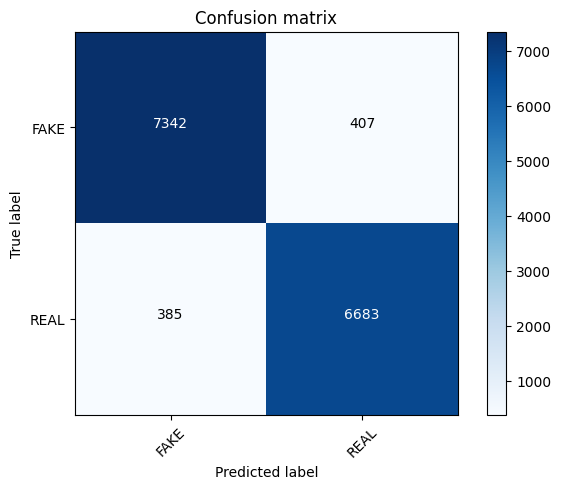

In [61]:
from sklearn import metrics
import numpy as np
import itertools
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [62]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score


0.9465478841870824

In [63]:
y_train.shape

(30081,)

In [69]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

linear_clf = PassiveAggressiveClassifier(max_iter=50, random_state=42)
linear_clf.fit(X_train, y_train)

pred = linear_clf.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred)

accuracy: 0.993


In [65]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Alpha: 0.0, Score : 0.9600458932307485
Alpha: 0.1, Score : 0.9500573665384355
Alpha: 0.2, Score : 0.949112505905379
Alpha: 0.30000000000000004, Score : 0.948910035769724
Alpha: 0.4, Score : 0.9484376054531957
Alpha: 0.5, Score : 0.948100155227104
Alpha: 0.6000000000000001, Score : 0.947695214955794
Alpha: 0.7000000000000001, Score : 0.9473577647297023
Alpha: 0.8, Score : 0.947087804548829
Alpha: 0.9, Score : 0.9468178443679557


In [76]:
from sklearn.linear_model import PassiveAggressiveClassifier

classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
classifier.fit(X_train, y_train)

feature_names = tfidf_v.get_feature_names_out()

coef = classifier.coef_[0]

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coef
})

top_real = coef_df.sort_values(by="coef", ascending=False).head(20)

top_fake = coef_df.sort_values(by="coef").head(20)

print("Top REAL words:\n", top_real)
print("\nTop FAKE words:\n", top_fake)

Top REAL words:
                        feature       coef
3782                   reuters  29.315549
4851        washington reuters  11.206920
3885                      said   6.458651
3784         reuters president   4.975917
3004                       nov   4.368634
3357          president donald   3.796268
3358    president donald trump   3.705754
1446                       edt   3.355881
3005              nov election   3.245548
2961          new york reuters   3.199299
4982              york reuters   3.199299
3823                     rival   3.155355
3938                    saying   3.143699
3708                republican   2.983558
3530                 questions   2.901596
1553                       est   2.901131
3785  reuters president barack   2.891882
2465                        km   2.877461
2619            london reuters   2.872443
3787        reuters republican   2.859900

Top FAKE words:
               feature      coef
3576             read -8.452676
1695   featured ima

In [78]:
from sklearn.feature_extraction.text import HashingVectorizer

hs_vectorizer = HashingVectorizer(
    n_features=5000,
    alternate_sign=False 
)

X = hs_vectorizer.fit_transform(corpus)

In [79]:
X.shape

(6522, 5000)

In [80]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 952195 stored elements and shape (6522, 5000)>

In [82]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split

hs_vectorizer = HashingVectorizer(n_features=5000, alternate_sign=False)

X = hs_vectorizer.fit_transform(df["text"])  # sparse matrix

y = df["label"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30081, 5000) (14817, 5000) (30081,) (14817,)


accuracy:   0.944
Confusion matrix, without normalization


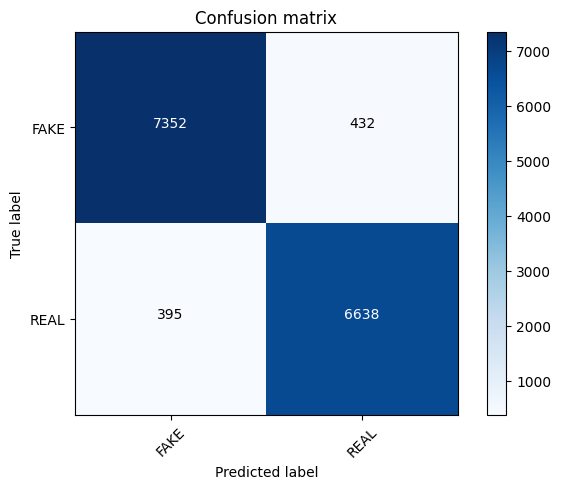

In [83]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])